# Importing Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing and creating Dataset

In [5]:
df = pd.read_csv('/Users/harmansingh/AI Engineering/Machine Learning/Reinforcement Learning/Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


# Implementing Thompson Sampling

In [6]:
import random
N=1000
d=10
ads_selected=[]
no_of_rewards_1=[0]*d
no_of_rewards_0=[0]*d
total_rewards=0

for n in range(0,N):
    ad=0
    max_random=0
    for i in range(0,d):
        random_beta = random.betavariate(no_of_rewards_1[i] +1,no_of_rewards_0[i] +1)
        if(random_beta > max_random):
            max_random=random_beta
            ad=i
    ads_selected.append(ad)
    if (df.values[n,ad]==1):
        no_of_rewards_1[ad]+=1
    else:
        no_of_rewards_0[ad]+=1
        
    reward = df.values[n, ad]
    total_rewards = total_rewards + reward

# Visualizing Thompson Sampling

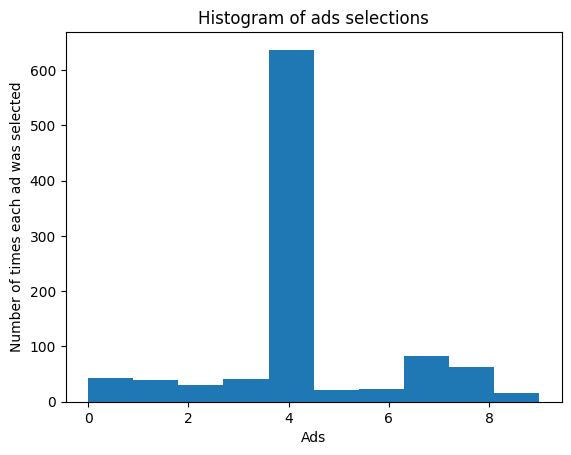

219


In [7]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()
print(total_rewards)